# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import numpy as np
from pandas import read_excel

In [2]:
data = read_excel('geo_comment.xlsx')
data1 = read_excel('geo.xlsx')
data.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
np.size(data.x.unique())

2457

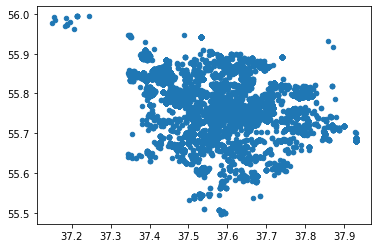

In [5]:
plt.scatter(data.x[:], data.y[:], cmap='autumn', s=20)

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Scaling the data to normalize
model = KMeans(n_clusters=5).fit(data1[['x','y']])


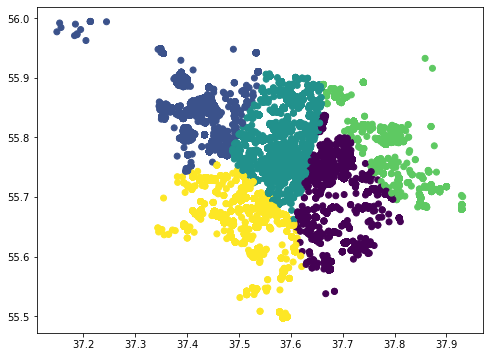

In [7]:
#визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
# Visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(data1.x[:], data1.y[:], c=model.labels_.astype(float))

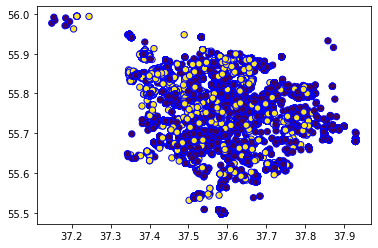

In [8]:
b=plt.scatter(data1.x[:], data1.y[:], c=data1.comment_class,  s=40, edgecolors='b')

In [9]:
#приведём данные по обеим осям к нормальному распределению

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_scaled = scaler.fit_transform(data1[['x','y']])
X_scaled

array([[ 0.36791896,  0.15955291],
       [ 0.36791896,  0.15955291],
       [ 0.2931784 , -0.34813064],
       ...,
       [-1.20058354,  1.1836816 ],
       [-0.97563233,  0.38377766],
       [-0.95317246,  1.00936916]])

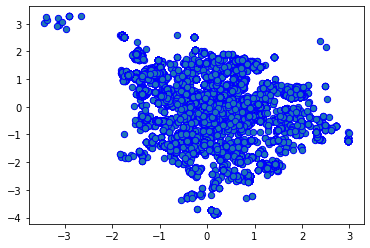

In [13]:
plt.scatter(X_scaled[:,0], X_scaled[:,1],  s=40, edgecolors='b')

In [14]:
#подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data1[['x','y']])
    k_inertia.append(clf_kmeans.inertia_)

In [15]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

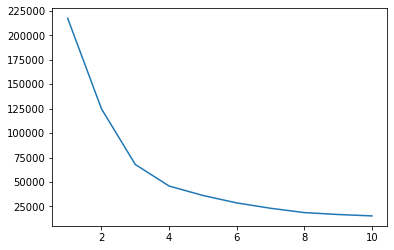

In [16]:
plt.plot(ks, k_inertia)

In [17]:
diff = np.diff(k_inertia)

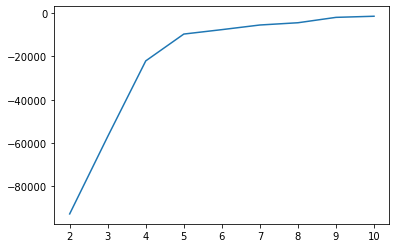

In [18]:
plt.plot(ks[1:], diff)

In [19]:
diff_r = diff[1:] / diff[:-1]

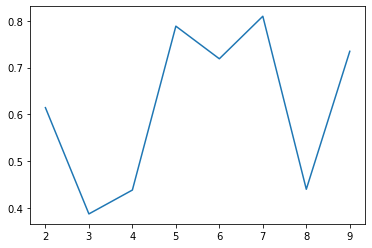

In [20]:
plt.plot(ks[1:-1], diff_r)

In [21]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3

In [22]:
#найти наиболее активные в голосовании районы 

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
data.multiplier.unique()

array([   1,    5,    4,   17,  196,   49,   54,   14,    3,    6,   15,
         12,   11,   53,   55,   47,   21,  109,   22,   23,   42,    8,
         28,   29,    2,  229,   35,   43,   26,   30,   32,   18,   10,
         62,  341,    7,   68,   67,   19,   16,  392,  147,  135, 1273,
        425,   27,   57,    9,  149,   13,   60,   96,  409,   66,   20,
        519,   95,  116,   52,   45,  125,   81,   44,   50,  915,  119,
        193,  302, 1182,  131,  198,  260,   24,  220,   58, 1500])

In [26]:
import seaborn as sns
def get_boxplot(X, columns=[]):
  for i in columns:
    sns.boxplot(x=X[i])
  pass 

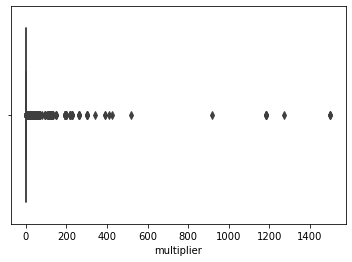

In [27]:
#check the distribution of people
get_boxplot(data,columns=['multiplier'])

In [28]:
#the most active district is such, when there are more than 20 participants
active_data = data[data.multiplier>20]

In [29]:
dbsc = DBSCAN(eps=0.01)
clusters = dbsc.fit_predict(active_data[['x','y']])

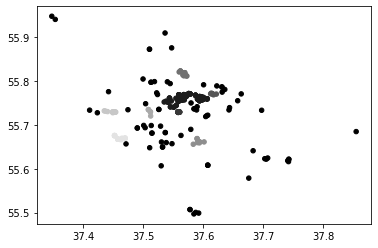

In [30]:
plt.scatter(active_data.x[:], active_data.y[:], c=clusters,  cmap='gray', s=20)